In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
%pylab inline
color = sns.color_palette()
#참고 https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-v3-0

Populating the interactive namespace from numpy and matplotlib


In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
  
    cols = [x for x in list(df.columns) ]
    
    for col in tqdm(cols):
        col_type = df[col].dtype

        if col_type not in [object]:

            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
# 데이터 불러와서 메모리 최적화 시킨 후 객체 저장하기
# 한번 저장해두고 나면 이후에 하지 않아도 됨.
df= pd.read_csv('train_ver2.csv')
df = reduce_mem_usage(df)
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df.to_pickle('train_pkl.pkl')

tst= pd.read_csv('test_ver2.csv')
tst= reduce_mem_usage(tst)
tst["fecha_dato"] = pd.to_datetime(tst["fecha_dato"],format="%Y-%m-%d")
tst["fecha_alta"] = pd.to_datetime(tst["fecha_alta"],format="%Y-%m-%d")
tst.to_pickle('test_pkl.pkl')



C:\Users\yseon\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Memory usage of dataframe is 4997.79 MB


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:37<00:00,  4.76it/s]


Memory usage after optimization is: 859.42 MB
Decreased by 82.8%


C:\Users\yseon\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Memory usage of dataframe is 170.22 MB


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.26it/s]


Memory usage after optimization is: 58.01 MB
Decreased by 65.9%


In [4]:
df = pd.read_pickle('train_pkl.pkl')
tst= pd.read_pickle('test_pkl.pkl')

In [5]:
# Target Columns 이 총 24개 이다. 

# http://alanpryorjr.com/2016-12-19-Kaggle-Competition-Santander-Solution/ 
print(df.shape)
print(tst.shape)

(13647309, 48)
(929615, 24)


In [6]:
# Visualization
# Month
df['month'] = pd.DatetimeIndex(df['fecha_dato']).month
df['year'] = pd.DatetimeIndex(df['fecha_dato']).year


In [7]:
df.columns


Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'month',
       'year'],
      dtype='object')

In [8]:
df.groupby('ncodpers').agg('size').value_counts()

17    605464
11    190917
8      28061
9      23470
7      16098
10     14911
1      10472
6      10012
5       8864
4       7297
2       7256
3       7000
16      5756
15      5548
13      5286
14      5213
12      5020
dtype: int64

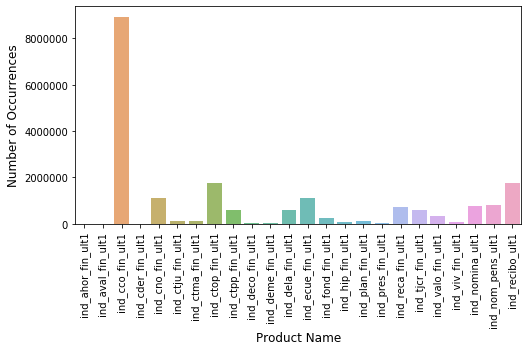

ind_ahor_fin_ult1    0.000102
ind_aval_fin_ult1    0.000023
ind_cco_fin_ult1     0.655484
ind_cder_fin_ult1    0.000394
ind_cno_fin_ult1     0.080867
ind_ctju_fin_ult1    0.009474
ind_ctma_fin_ult1    0.009727
ind_ctop_fin_ult1    0.129008
ind_ctpp_fin_ult1    0.043306
ind_deco_fin_ult1    0.001779
ind_deme_fin_ult1    0.001661
ind_dela_fin_ult1    0.042967
ind_ecue_fin_ult1    0.082744
ind_fond_fin_ult1    0.018486
ind_hip_fin_ult1     0.005887
ind_plan_fin_ult1    0.009171
ind_pres_fin_ult1    0.002627
ind_reca_fin_ult1    0.052536
ind_tjcr_fin_ult1    0.044389
ind_valo_fin_ult1    0.025608
ind_viv_fin_ult1     0.003848
ind_nomina_ult1      0.054660
ind_nom_pens_ult1    0.059359
ind_recibo_ult1      0.127916
dtype: float64

In [9]:
# Target value 분포 확인하기

cols = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 
         'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
         'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
         'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
         'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
         'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
         'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
         'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
         'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
         'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
         'ind_viv_fin_ult1', 'ind_nomina_ult1',
         'ind_nom_pens_ult1', 'ind_recibo_ult1']
target_counts = df[cols].astype('float64').sum(axis=0)
#print(target_counts)
plt.figure(figsize=(8,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

target_counts/df.shape[0]

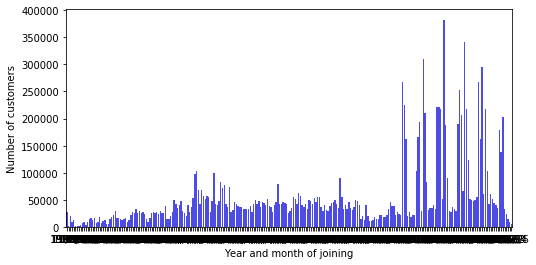

In [10]:
# fecha_dato : 데이터가 찍힌 시간
# fecha_alta : 고객이 된 날짜

df['firststart'] = df['fecha_alta'].dt.year.fillna(0).astype('int').astype('str') +'/'\
                   + df['fecha_alta'].dt.month.fillna(0).astype('int').astype('str')
yearmonth = list(df['firststart'].value_counts().index)
yearmonth.sort()
yearmonth = pd.DataFrame(yearmonth,columns=['yearmonth'])
yearmonth['counts'] = yearmonth['yearmonth'].map(df['firststart'].value_counts())

plt.figure(figsize=(8,4))
sns.barplot(yearmonth['yearmonth'],yearmonth['counts'] , alpha =0.8, color = 'b')
plt.xlabel('Year and month of joining')
plt.ylabel('Number of customers')
plt.show()
# print(yearmonth)

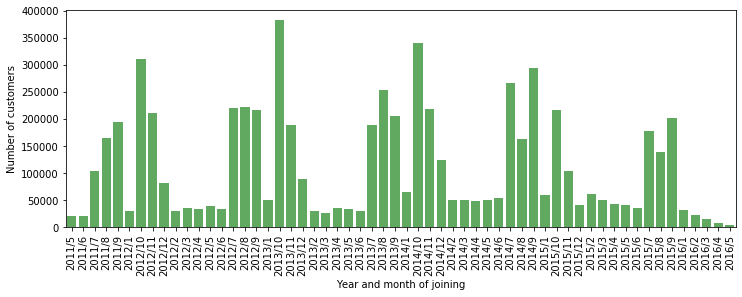

In [11]:
# 최근데이터만
# fecha_alta : 고객이 된 날짜

df['firststart'] = df['fecha_alta'].dt.year.fillna(0).astype('int').astype('str') +'/'\
                   + df['fecha_alta'].dt.month.fillna(0).astype('int').astype('str')
yearmonth = list(df['firststart'].value_counts().index)
yearmonth.sort()
yearmonth = yearmonth[200:]
yearmonth = pd.DataFrame(yearmonth,columns=['yearmonth'])
yearmonth['counts'] = yearmonth['yearmonth'].map(df['firststart'].value_counts())

plt.figure(figsize=(12,4))
sns.barplot(yearmonth['yearmonth'],yearmonth['counts'] , alpha =0.8, color =color[2])
plt.xlabel('Year and month of joining')
plt.ylabel('Number of customers')
plt.xticks(rotation='vertical')
plt.show()
# print(yearmonth)

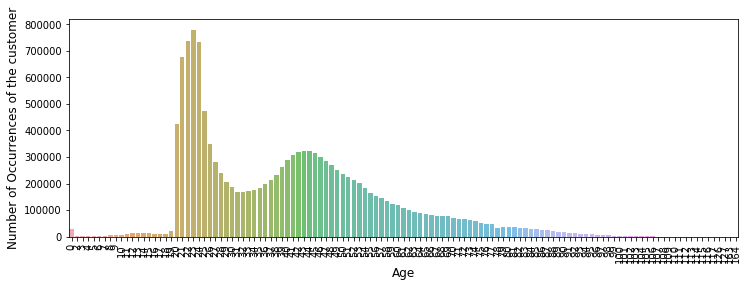

In [12]:
# 연령대 분포 확인하기 age
df['age'] = df['age'].replace(' NA',np.nan).astype('object').fillna(0).astype('int')

age_series = df['age'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(age_series.index.astype('int'), age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

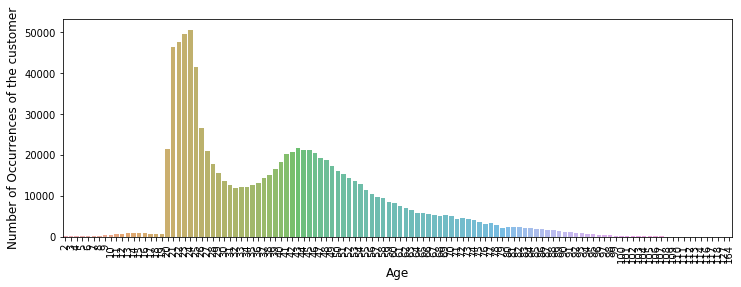

In [13]:
# 연령대 분포 확인하기 age
tst['age'] = tst['age'].replace(' NA',np.nan).astype('object').fillna(0).astype('int')

age_series = tst['age'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(age_series.index.astype('int'), age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

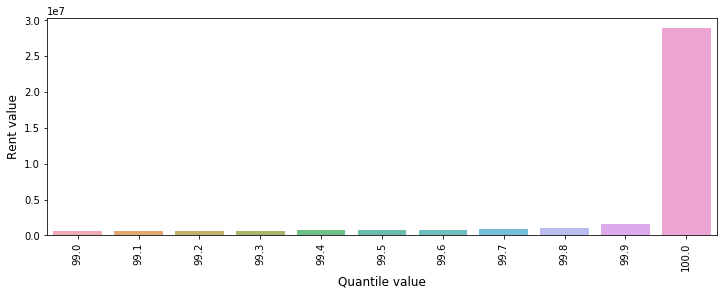

In [14]:
# ranta values
quantile_series = df.renta.quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot((quantile_series.index*100), quantile_series.values, alpha=0.8)
plt.ylabel('Rent value', fontsize=12)
plt.xlabel('Quantile value', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\yseon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\yseon\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yseon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


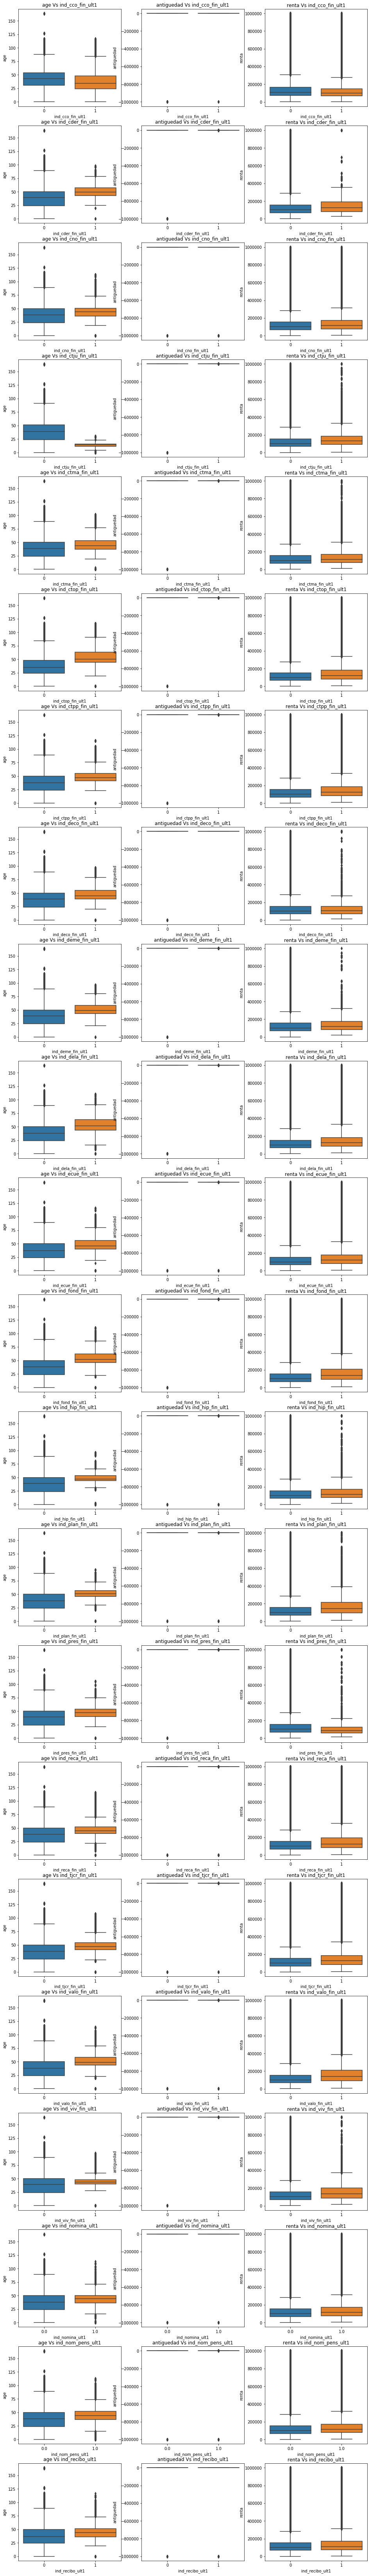

In [15]:
# numerical values vs. targer values

target_cols = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1']
df[target_cols] = (df[target_cols].fillna(0))
df["age"] = df['age'].astype('str').map(str.strip).replace(['NA'], value=0).astype('float')
df["antiguedad"] = df["antiguedad"].astype('str').map(str.strip)
df["antiguedad"] = df['antiguedad'].replace(['NA'], value=0).astype('float')
df["antiguedad"].ix[df["antiguedad"]>65] = 65 # there is one very high skewing the graph
df["renta"].ix[df["renta"]>1e6] = 1e6 # capping the higher values for better visualisation

# df.fillna(-1, inplace=True)
fig = plt.figure(figsize=(16, 120))
numeric_cols = ['age', 'antiguedad', 'renta']
#for ind1, numeric_col in enumerate(numeric_cols):
plot_count = 0
for ind, target_col in enumerate(target_cols):
    for numeric_col in numeric_cols:
        plot_count += 1
        plt.subplot(22, 3, plot_count)
        sns.boxplot(x=target_col, y=numeric_col, data=df)
        plt.title(numeric_col+" Vs "+target_col)
plt.show()


Number of unique values in  ind_empleado  :  6


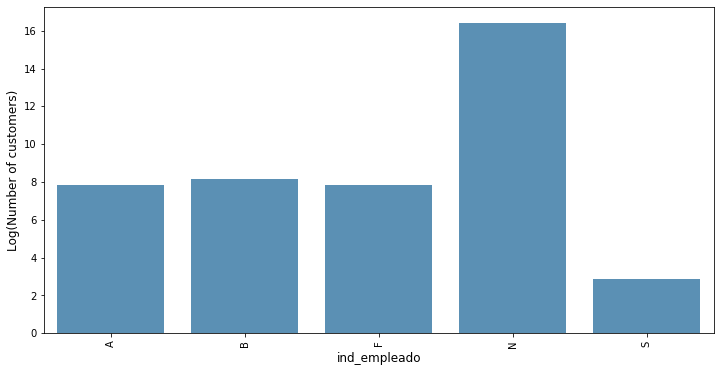


Number of unique values in  pais_residencia  :  119


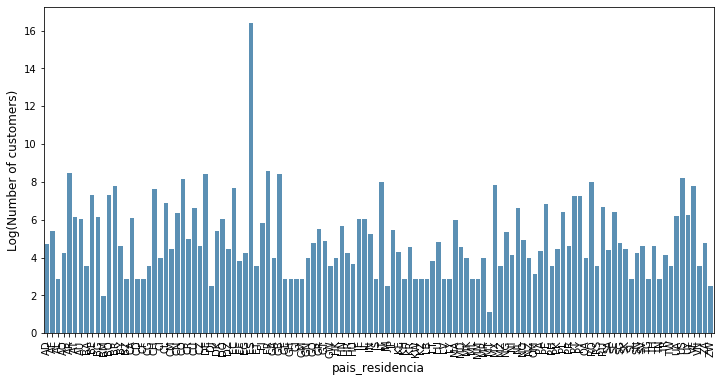


Number of unique values in  sexo  :  3


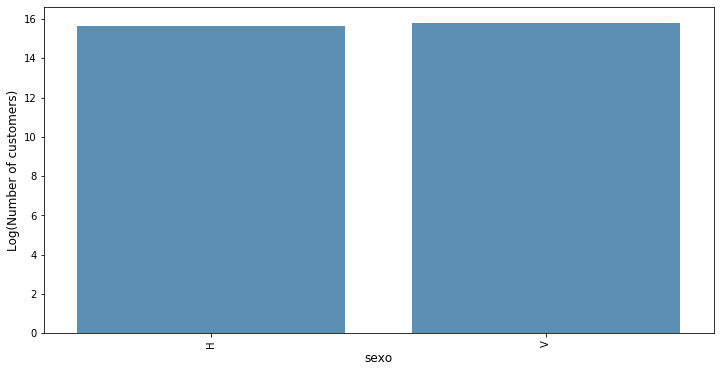


Number of unique values in  ind_nuevo  :  3


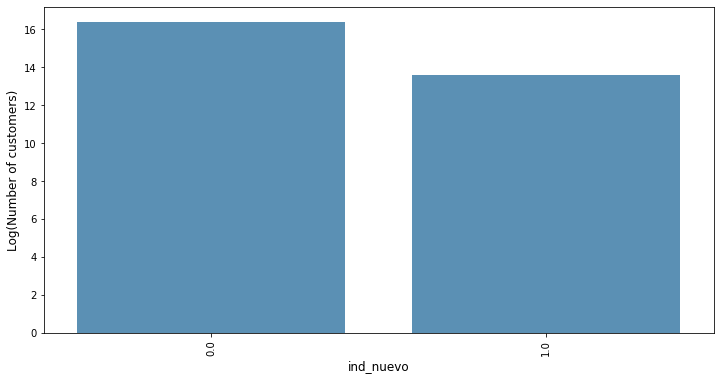


Number of unique values in  indrel  :  3


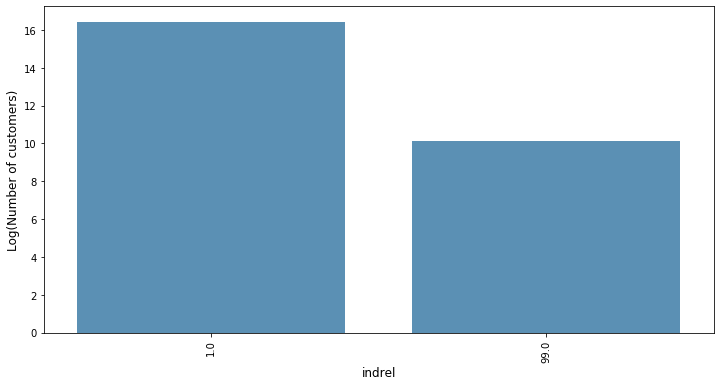


Number of unique values in  ult_fec_cli_1t  :  224

Number of unique values in  indrel_1mes  :  14


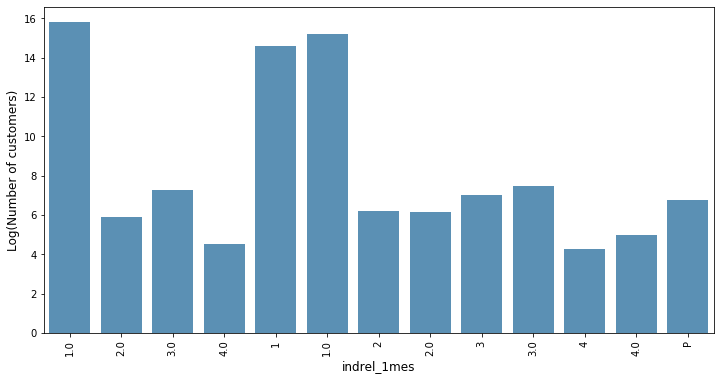


Number of unique values in  tiprel_1mes  :  6


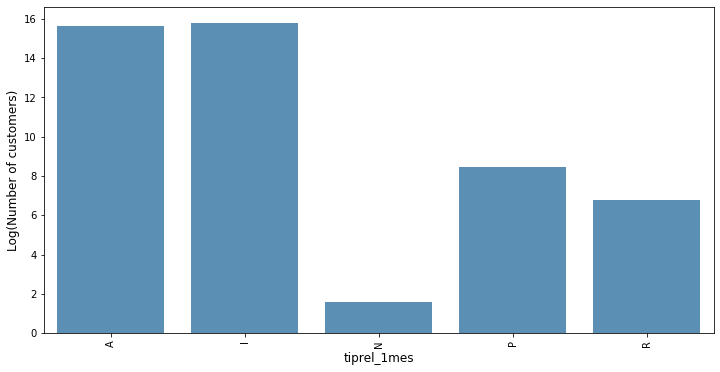


Number of unique values in  indresi  :  3


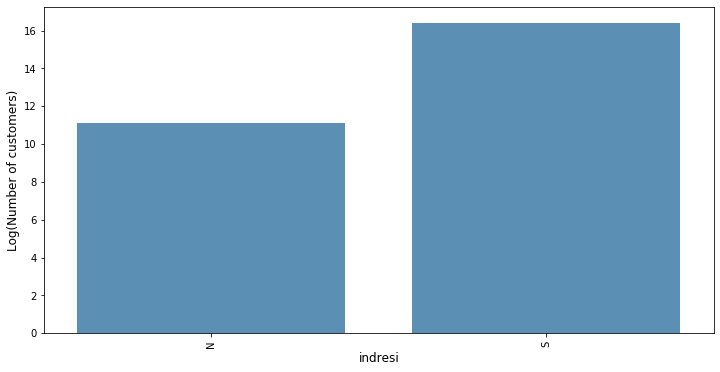


Number of unique values in  indext  :  3


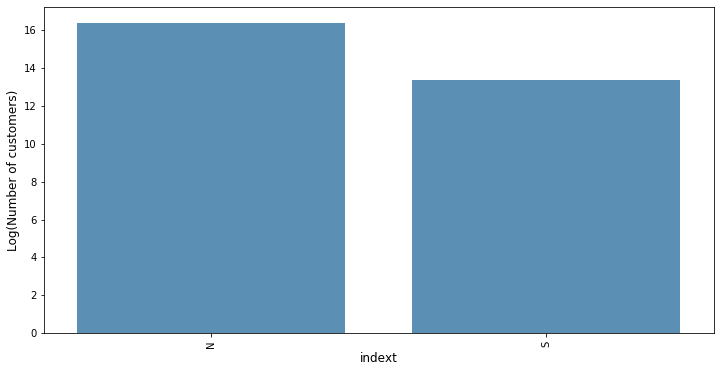


Number of unique values in  conyuemp  :  3


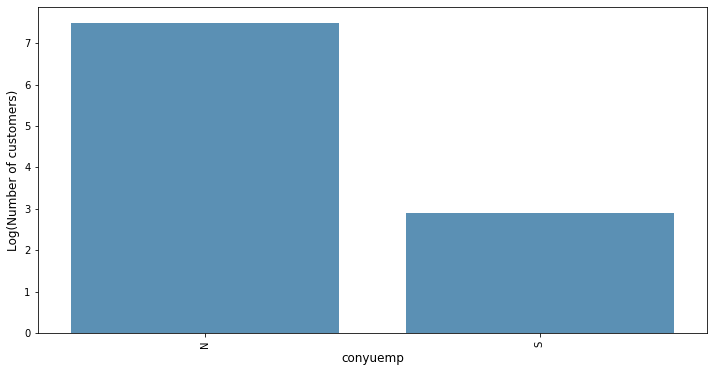


Number of unique values in  canal_entrada  :  163


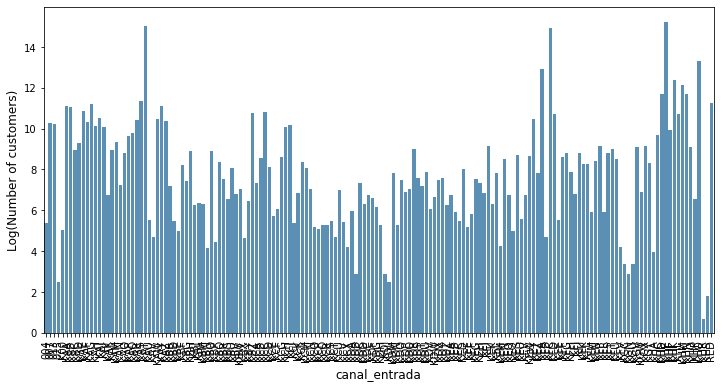


Number of unique values in  indfall  :  3


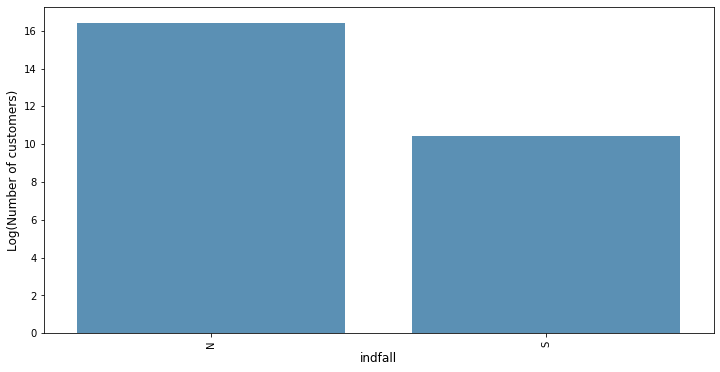


Number of unique values in  tipodom  :  2


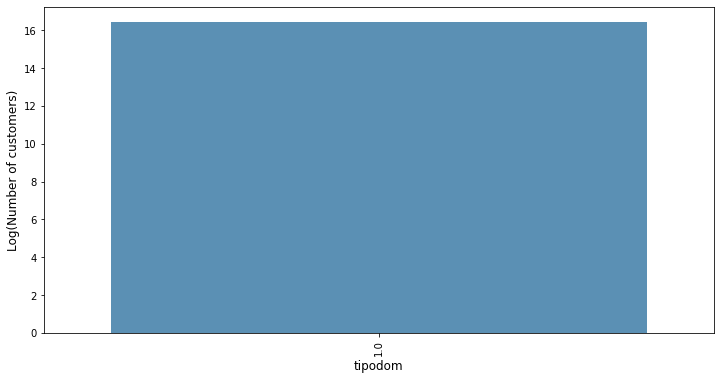


Number of unique values in  cod_prov  :  53


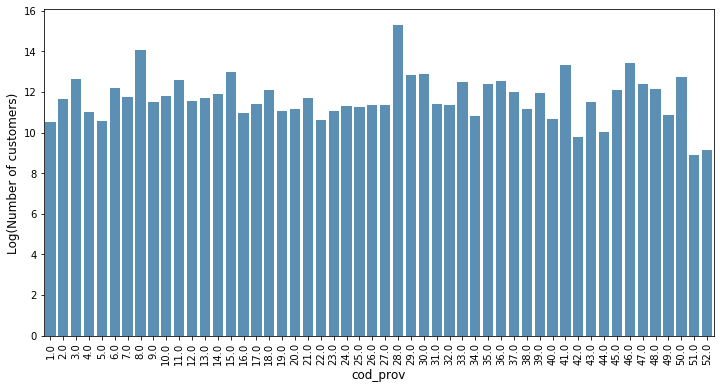


Number of unique values in  nomprov  :  53


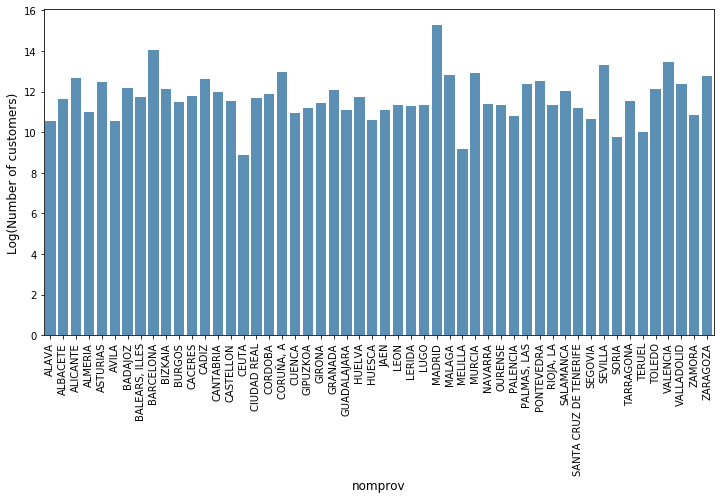


Number of unique values in  ind_actividad_cliente  :  3


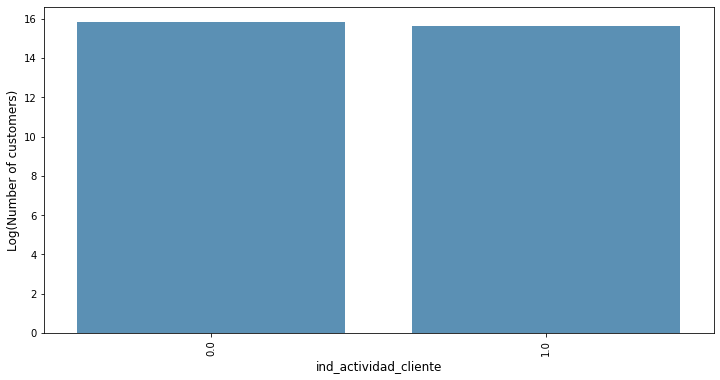


Number of unique values in  segmento  :  4


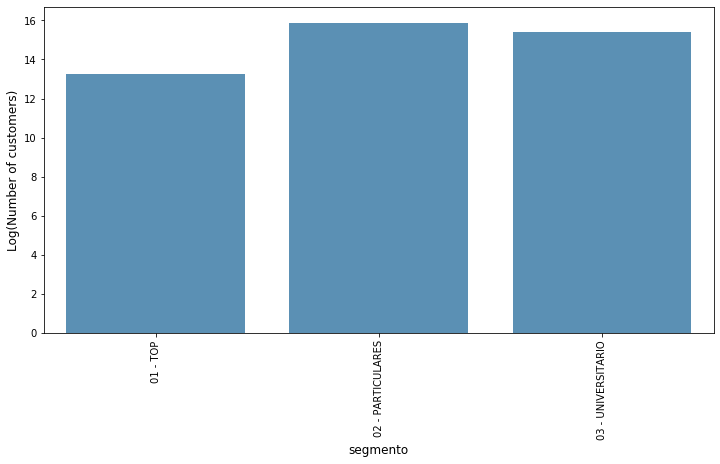

In [16]:
cols = ["ind_empleado","pais_residencia","sexo","ind_nuevo","indrel","ult_fec_cli_1t","indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","segmento"]
for col in cols:
#     df = pd.read_csv("../input/df_ver2.csv", usecols = ["ncodpers", col], nrows=1000000)
    try :
        c_df = df[col].fillna(-99)
    except : df[col].cat.add_categories(-99).fillna(-99)
    len_unique = len(df[col].unique())
    print("Number of unique values in ",col," : ",len_unique)
    if len_unique < 200:
        agg_df = df[col].value_counts()
        plt.figure(figsize=(12,6))
        sns.barplot(agg_df.index, np.log1p(agg_df.values), alpha=0.8, color=color[0])
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Log(Number of customers)', fontsize=12)
        plt.xticks(rotation='vertical')
        plt.show()
    print()
